# Izzy's mapping exercise
Choose one of the map ideas below, processed the data with GeoPandas and export the data to QGIS for presentation. *Hint: You might need to change data types using the `dtype` argument when importing files so that you can merge with FIPS and ZIP codes effectively.*

#### Load python tools

In [1]:
%load_ext lab_black

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np

In [3]:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 1000

---

### Vehicle map
##### What's the Tesla ownership rate by LA ZIP Codes?

In [4]:
# Values: https://raw.githubusercontent.com/stiles/notebooks/master/california-fuel-vehicles/output/tesla_zips_slim.csv
# Geo: https://raw.githubusercontent.com/stiles/notebooks/master/zips/data/processed/ca_zips_simple.geojson.json

#### Read Tesla data

In [5]:
teslas_df = pd.read_csv(
    "https://raw.githubusercontent.com/stiles/notebooks/master/california-fuel-vehicles/output/tesla_zips_slim.csv",
    dtype={"zip": str},
)

In [6]:
teslas_df.dtypes

zip                  object
name                 object
teslas                int64
all_vehicles          int64
tesla_rate_1k       float64
avg_house_income      int64
avg_net_worth         int64
dtype: object

In [7]:
teslas_df.sort_values("avg_house_income", ascending=False)

,zip,name,teslas,all_vehicles,tesla_rate_1k,avg_house_income,avg_net_worth
563,94027,Atherton,527,5156,102.21,297732,3680197
49,90077,Los Angeles,342,6333,54.00,280179,3548806
564,94028,Portola Valley,358,4854,73.75,263238,3322715
561,94024,Los Altos,1210,14929,81.05,259185,3442702
69,90272,Pacific Palisades,810,14987,54.05,249224,2989010
622,94507,Alamo,448,11332,39.53,249153,3459025
560,94022,Los Altos,1227,13820,88.78,248970,3041961
416,92657,Newport Coast,573,8343,68.68,244565,2836260
658,94563,Orinda,551,12697,43.40,244323,3410284
744,95070,Saratoga,1586,21471,73.87,243915,3157204


In [8]:
teslas_df.head()

,zip,name,teslas,all_vehicles,tesla_rate_1k,avg_house_income,avg_net_worth
0,90004,Los Angeles,200,22734,8.80,65893,232653
1,90005,Los Angeles,58,12518,4.63,53191,105569
2,90006,Los Angeles,26,17324,1.50,42242,39289
3,90007,Los Angeles,27,10707,2.52,38564,39966
4,90008,Los Angeles,54,12611,4.28,56286,284531


#### Read ZIP Codes geo file

In [9]:
zipcodes_gdf = gpd.read_file(
    "https://raw.githubusercontent.com/stiles/notebooks/master/zips/data/processed/ca_zips_simple.geojson.json"
)

In [10]:
zipcodes_gdf.head()

,id,name,county_name,geometry
0,90001,Los Angeles,Los Angeles County,"POLYGON ((-118.24329 33.98901, -118.25996 33.9..."
1,90002,Los Angeles,Los Angeles County,"POLYGON ((-118.23085 33.95772, -118.23160 33.9..."
2,90003,Los Angeles,Los Angeles County,"POLYGON ((-118.28268 33.98926, -118.28383 33.9..."
3,90004,Los Angeles,Los Angeles County,"MULTIPOLYGON (((-118.33852 34.06891, -118.3371..."
4,90005,Los Angeles,Los Angeles County,"POLYGON ((-118.31879 34.05514, -118.30658 34.0..."


<AxesSubplot:>

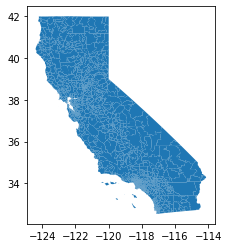

In [11]:
zipcodes_gdf.plot()

#### Merge the two

In [12]:
merged_teslas_gdf = pd.merge(zipcodes_gdf, teslas_df, left_on="id", right_on="zip")

<AxesSubplot:>

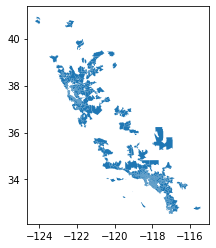

In [13]:
merged_teslas_gdf.plot()

#### Export merged geo file

In [15]:
merged_teslas_gdf.to_file(
    "/users/isabellazavarise/github/usc/students/zavarise/data/processed/teslas_los_angeles_geojson",
    driver="GeoJSON",
)

---